<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3_example_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Create and plot a sine function

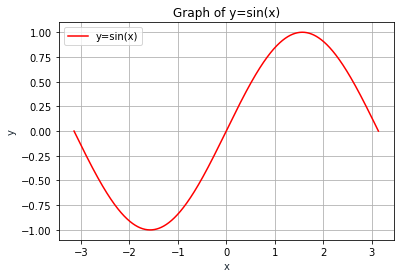

In [ ]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
plt.plot(x.cpu(), y.cpu(), '-r', label='y=sin(x)')
plt.title('Graph of y=sin(x)')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Create a four-parameter polynomial to approximate a given function

0 77250.53125


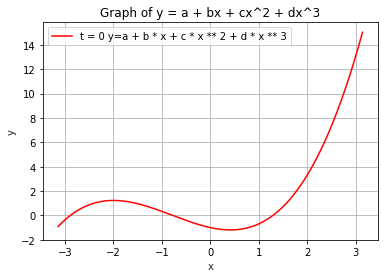

100 2901.24755859375
200 1957.4586181640625
300 1322.847900390625
400 895.759521484375
500 608.073486328125


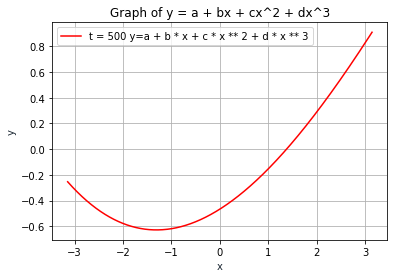

600 414.1091003417969
700 283.2091369628906
800 194.78244018554688
900 134.9881591796875
1000 94.51312255859375


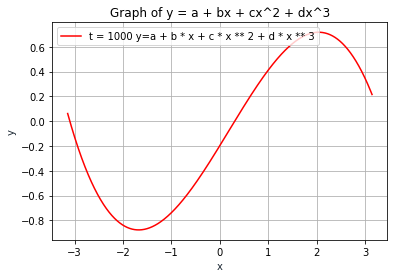

1100 67.0867919921875
1200 48.48243713378906
1300 35.84858703613281
1400 27.259765625
1500 21.414344787597656


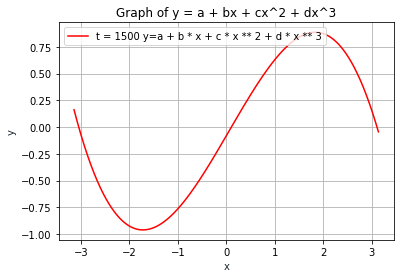

1600 17.431549072265625
1700 14.714761734008789
1800 12.859421730041504
1900 11.59091567993164
2000 10.722658157348633


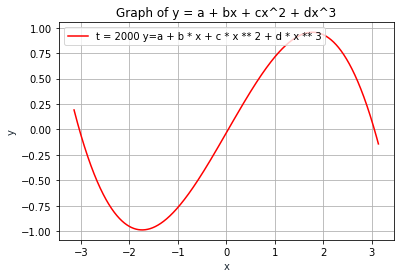

Result: y = -0.03491334244608879 + 0.8289462924003601 x + 0.006023131776601076 x^2 + -0.08937685936689377 x^3


In [ ]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

#namjestimo stopu učenja
learning_rate = 1e-6

# Training petlja
for t in range(2001):
    # forward propagation
    # use trained parameters to get an approximate value
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # mean square error
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 0:
        print(t, loss)

    # backpropagation
    # partial derivatives of a, b, c, d with respect to the error
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # update the parameters
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    # display the graph to show the learning process
    if t % 500 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu(), y_graph.cpu(), '-r', label='t = ' + str(t) + ' y=a + b * x + c * x ** 2 + d * x ** 3')
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

# display the fully-trained parameters
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
